# Support Vector Machine (SVM) - Wine Dataset

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

## Importing the dataset

In [2]:
wine = datasets.load_wine()
X = wine.data
y = wine.target
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (178, 13), Target shape: (178,)


## Exploratory Data Analysis

In [3]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Dimensionality Reduction for Visualization

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Plot the original Data (after PCA)

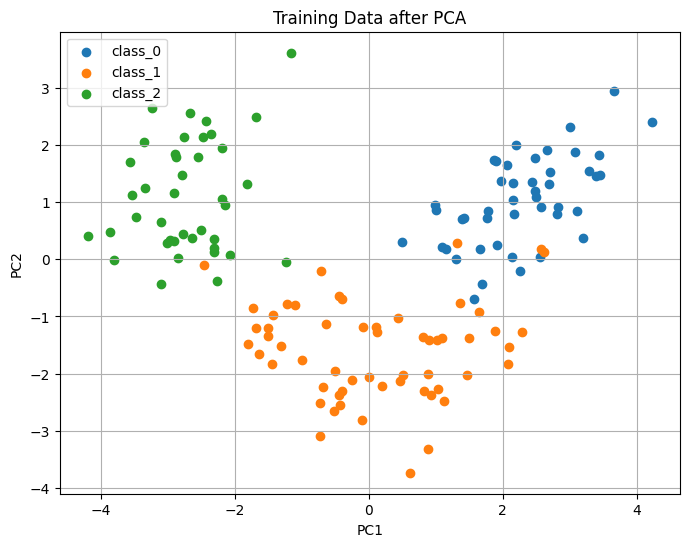

In [7]:
plt.figure(figsize=(8,6))
for i in np.unique(y_train):
    plt.scatter(X_train_pca[y_train==i, 0], X_train_pca[y_train==i, 1], label=wine.target_names[i])
plt.title('Training Data after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

## Training the SVM model on the Training set

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

### Display the support vectors of the model

In [9]:
classifier.support_vectors_

array([[ 1.11249311e-01, -7.66314624e-01, -9.37507273e-01,
        -1.15413707e+00, -1.67384257e-01,  1.74542037e-01,
         6.37487076e-01, -6.88709520e-01, -4.09266382e-01,
        -5.84495765e-01,  9.58609289e-01,  1.35052801e-01,
         9.46386141e-01],
       [ 8.67761863e-02, -5.29451494e-01, -9.37507273e-01,
        -7.18420667e-01,  4.49091480e-01,  1.11873134e+00,
         9.97261191e-01, -6.88709520e-01,  7.25539692e-01,
        -7.57982889e-03, -3.27425721e-01,  1.05223748e+00,
         4.98264063e-01],
       [ 8.67761863e-02, -2.83815655e-01,  3.08790193e+00,
         1.60540017e+00,  1.61354565e+00,  5.36481270e-01,
         6.77461977e-01,  7.97801108e-01,  5.36405347e-01,
        -6.36159879e-01,  7.44270121e-01,  8.43786414e-01,
         3.15695809e-01],
       [ 3.19270874e-01,  1.40931709e+00, -2.54625356e-01,
        -5.73181865e-01,  1.75102263e-01,  5.52217758e-01,
         6.27493350e-01, -3.75759914e-01,  8.93605295e-02,
        -3.00343140e-01, -5.84632723e

## Finding Accuracy of model on Test and Train Set

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_pred = classifier.predict(X_train_scaled)
test_pred = classifier.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9722222222222222


## Finding Accuracy of model using confusion matrix

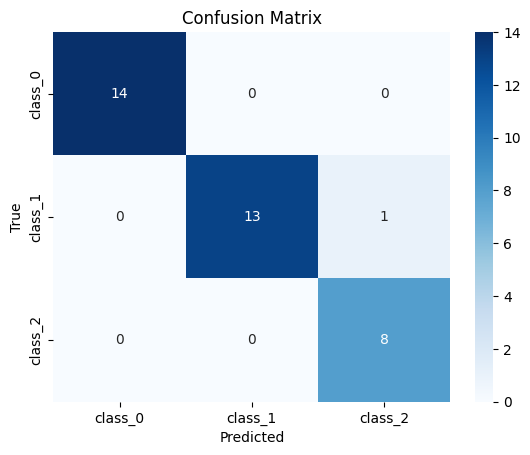

In [11]:
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Create the function for Visualizing Testing and Training model

In [12]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=wine.target_names[i])
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    plt.show()

## Visualising the Train set results

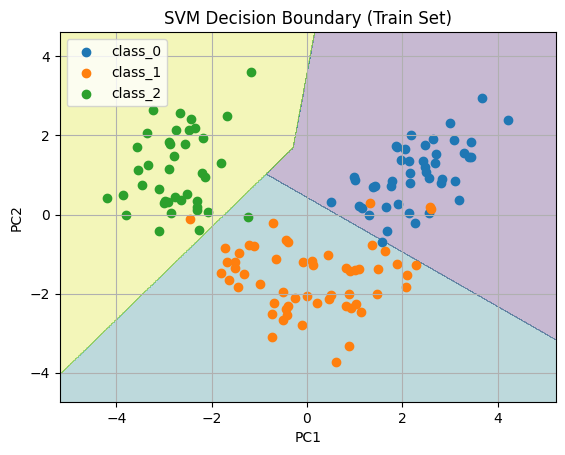

In [13]:
plot_decision_boundary(X_train_pca, y_train, classifier, 'SVM Decision Boundary (Train Set)')

## Visualising the Test set results

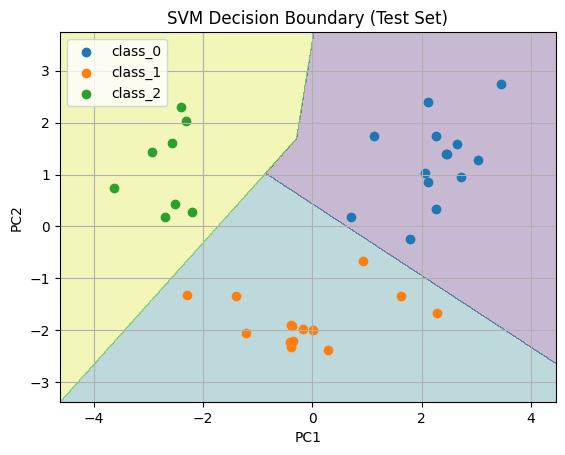

In [14]:
plot_decision_boundary(X_test_pca, y_test, classifier, 'SVM Decision Boundary (Test Set)')